In [2]:
import chainladder as cl
from bayesianchainladder import BayesianChainLadderGLM
import arviz as az

# Load a sample triangle
clrd = cl.load_sample("clrd")
triangle = clrd.loc[("New Jersey Manufacturers Grp", "wkcomp"), "CumPaidLoss"]

# Fit the Bayesian chain ladder model
model = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model.fit(triangle)

# Get reserve summary
print(model.summary())

# Access posterior samples
reserve_samples = model.sample_reserves(n_samples=1000)


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


          Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663484e+05    291.171431  1.663348e+05    3445.364755   
1990      176346.0  1.845208e+05    454.889232  1.845082e+05    8174.769375   
1991      187266.0  2.024107e+05    694.272036  2.023881e+05   15144.653512   
1992      189506.0  2.122594e+05    964.984216  2.122328e+05   22753.449807   
1993      175475.0  2.073883e+05   1304.656364  2.073560e+05   31913.315216   
1994      159972.0  2.055611e+05   1977.869358  2.055122e+05   45589.073940   
1995      122811.0  1.832073e+05   2877.021289  1.831076e+05   60396.254445   
1996       92242.0  1.733825e+05   4569.970272  1.732046e+05   81140.485801   
1997       43962.0  1.506989e+05   8277.886870  1.502320e+05  106736.897040   
Total    1310483.0  1.685777e+06  11873.963466  1.685512e+06  375294.263893   

                                    
              

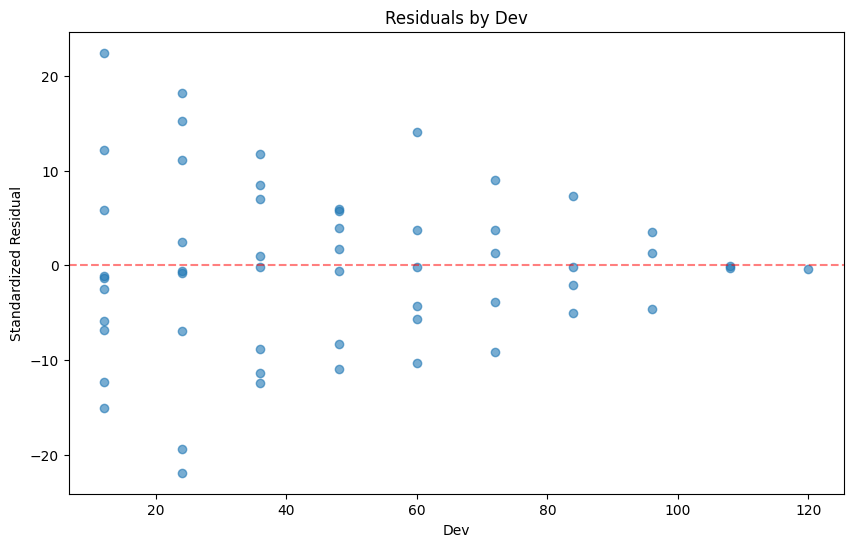

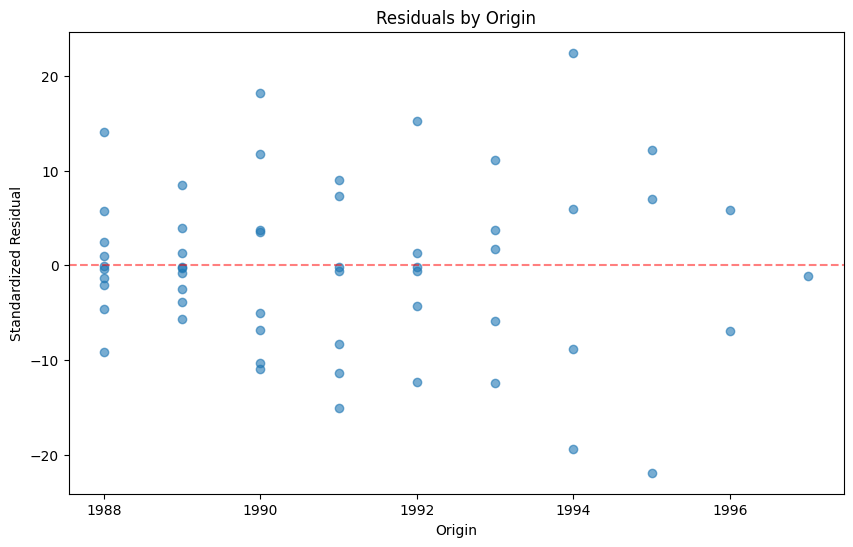

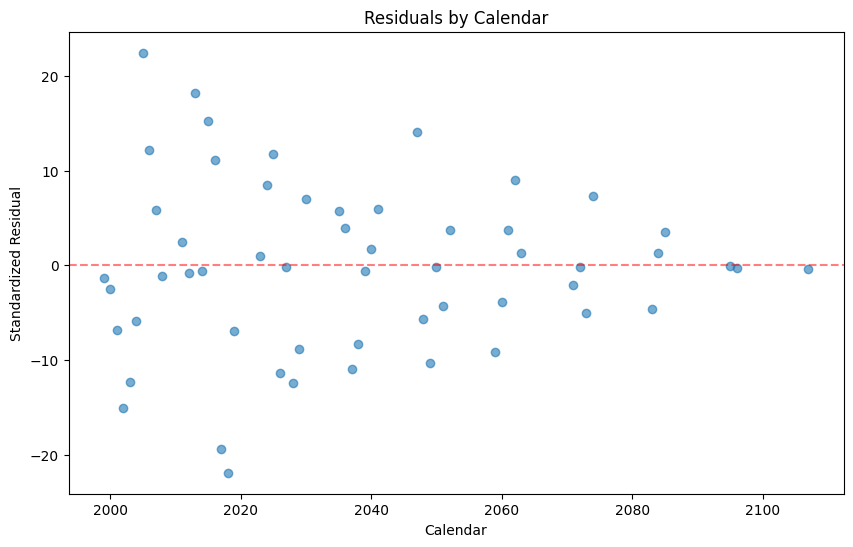

In [15]:
from bayesianchainladder import (
    plot_trace,
    plot_ppc,
    plot_reserve_distribution,
    plot_residuals,
    plot_heatmap_residuals,
    plot_development_pattern
)

fig, ax = plot_residuals(model, by="dev")
fig, ax = plot_residuals(model, by="origin")
fig, ax = plot_residuals(model, by="calendar")

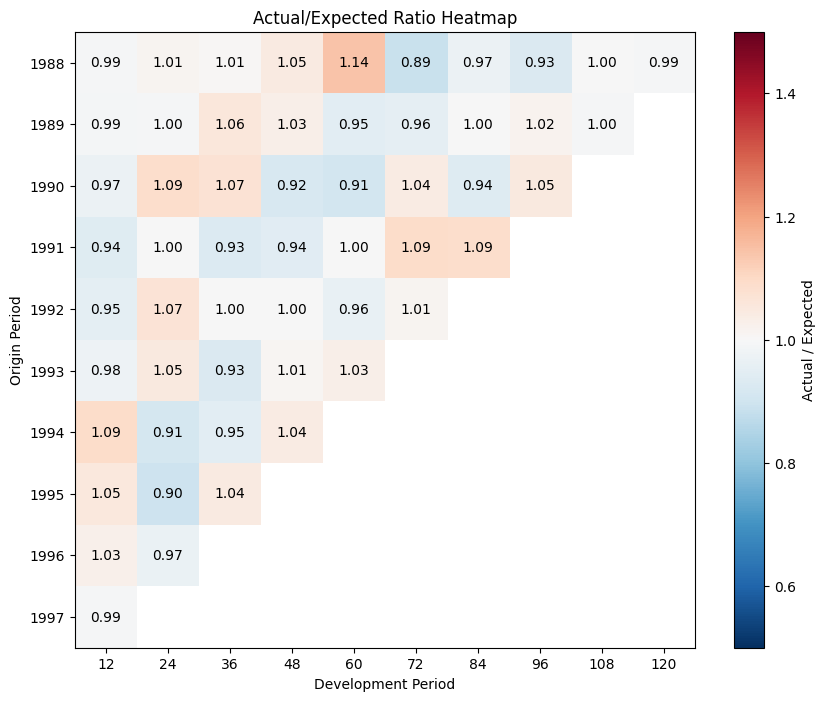

In [16]:
fig, ax = plot_heatmap_residuals(model)

In [17]:
model.ibnr_

,mean,std,median,5%,25%,75%,95%
origin,,,,,,,
1989,3446.921065,286.638982,3432.052852,3000.334389,3255.737122,3623.272315,3944.366037
1990,8175.860461,458.033249,8165.437614,7457.418725,7868.023257,8471.334041,8959.178380
1991,15141.745866,697.414145,15127.176606,14046.048586,14659.500851,15590.605306,16305.487527
1992,22745.212952,952.335728,22719.141228,21223.855337,22106.873210,23353.024854,24382.872309
1993,31910.613502,1323.469883,31903.242260,29756.927158,31031.632878,32772.290490,34138.309063
1994,45604.086674,1985.489886,45573.592332,42444.585942,44259.908029,46890.077851,48904.048273
1995,60456.842818,2879.077936,60417.046978,55847.833489,58505.732627,62296.859384,65284.346718
1996,81267.198415,4565.710419,81071.312495,74100.480252,78136.297947,84138.377348,89052.437234
1997,106602.504336,8213.903578,106189.944163,93813.257579,100956.332168,111752.760998,120725.287209


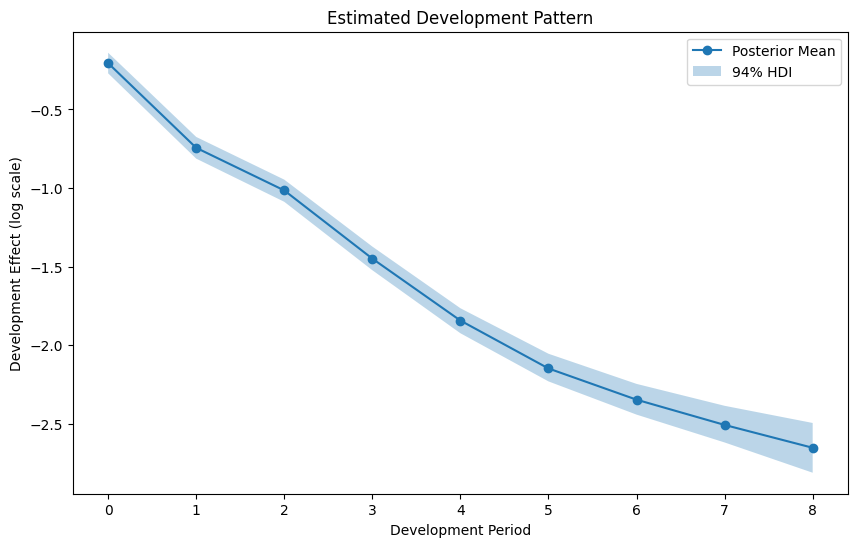

In [18]:
fig, ax = plot_development_pattern(model)

In [19]:
from bayesianchainladder import extract_parameter_summary

extract_parameter_summary(model.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.647,0.036,10.580,10.716,0.001,0.001,1970.0,3021.0,1.0
C(origin)[1989],0.146,0.035,0.083,0.214,0.001,0.000,3525.0,4499.0,1.0
C(origin)[1990],0.242,0.037,0.173,0.313,0.001,0.000,3828.0,4929.0,1.0
C(origin)[1991],0.371,0.038,0.301,0.445,0.001,0.000,3463.0,4726.0,1.0
C(origin)[1992],0.392,0.040,0.320,0.468,0.001,0.000,3420.0,4844.0,1.0
C(origin)[1993],0.370,0.043,0.292,0.453,0.001,0.000,3729.0,5109.0,1.0
C(origin)[1994],0.356,0.046,0.265,0.439,0.001,0.001,4046.0,4517.0,1.0
C(origin)[1995],0.247,0.052,0.143,0.340,0.001,0.001,4060.0,5181.0,1.0
C(origin)[1996],0.189,0.060,0.076,0.304,0.001,0.001,4765.0,5536.0,1.0
C(origin)[1997],0.047,0.080,-0.101,0.199,0.001,0.001,4710.0,5553.0,1.0


In [20]:
# Fit the Bayesian chain ladder model
model_spline = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + bs(dev, df=5)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_spline.fit(triangle)

# Get reserve summary
model_spline.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), bs(dev, df=5)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.665849e+05    316.077648  1.665670e+05    3681.915619   
1990      176346.0  1.845698e+05    512.515821  1.845440e+05    8223.791147   
1991      187266.0  2.021613e+05    777.745060  2.021373e+05   14895.280299   
1992      189506.0  2.122519e+05   1079.096559  2.122228e+05   22745.882227   
1993      175475.0  2.080926e+05   1519.938725  2.080387e+05   32617.554815   
1994      159972.0  2.064596e+05   2289.496051  2.064101e+05   46487.594320   
1995      122811.0  1.814470e+05   3164.088799  1.813291e+05   58636.023168   
1996       92242.0  1.745674e+05   5301.013808  1.743925e+05   82325.363596   
1997       43962.0  1.508603e+05   9574.852697  1.503889e+05  106898.320670   
Total    1310483.0  1.686995e+06  13594.070487  1.686543e+06  376511.725859   

                                    
                std         median  
1989     316.077648    3663.962025  
1990     512.515821    8198.005253  
1991     777.745060   14871.296993  
1992    1079.096559   22716.765510  
1993    1519.938725   32563.652265  
1994    2289.496051   46438.122325  
1995    3164.088799   58518.070341  
1996    5301.013808   82150.459142  
1997    9574.852697  106426.911446  
Total  13594.070487  376060.463421

In [21]:
# Fit the Bayesian chain ladder model
model_quad = BayesianChainLadderGLM(
    formula="incremental ~ 1 + origin_idx + {origin_idx**2} + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_quad.fit(triangle)

# Get reserve summary
model_quad.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, origin_idx, I(origin_idx ** 2), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


Ultimate                                                    IBNR  \
      paid_to_date          mean          std        median           mean   
1989      162903.0  1.658746e+05   208.461689  1.658640e+05    2971.601239   
1990      176346.0  1.837954e+05   319.072930  1.837869e+05    7449.422464   
1991      187266.0  2.008319e+05   446.122295  2.008159e+05   13565.934938   
1992      189506.0  2.111003e+05   609.833456  2.110820e+05   21594.333005   
1993      175475.0  2.077571e+05   807.398455  2.077415e+05   32282.085926   
1994      159972.0  2.068845e+05  1071.106619  2.068745e+05   46912.535485   
1995      122811.0  1.898115e+05  1470.596719  1.897953e+05   67000.540683   
1996       92242.0  1.809573e+05  2174.486936  1.809365e+05   88715.273465   
1997       43962.0  1.641608e+05  3802.202743  1.641064e+05  120198.755639   
Total    1310483.0  1.711173e+06  8655.668814  1.711089e+06  400690.482844   

                                   
               std         median  
1989    208.461689    2960.950638  
1990    319.072930    7440.946918  
1991    446.122295   13549.928328  
1992    609.833456   21575.950754  
1993    807.398455   32266.488019  
1994   1071.106619   46902.467023  
1995   1470.596719   66984.324370  
1996   2174.486936   88694.490615  
1997   3802.202743  120144.383303  
Total  8655.668814  400605.587474

In [22]:
extract_parameter_summary(model_quad.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.457,0.039,10.384,10.530,0.001,0.000,3584.0,4279.0,1.0
origin_idx,0.208,0.015,0.179,0.236,0.000,0.000,4290.0,4687.0,1.0
I(origin_idx ** 2),-0.019,0.002,-0.021,-0.016,0.000,0.000,4223.0,4305.0,1.0
C(dev)[24],-0.208,0.032,-0.268,-0.144,0.001,0.000,3558.0,4692.0,1.0
C(dev)[36],-0.749,0.034,-0.811,-0.683,0.001,0.000,3422.0,4462.0,1.0
C(dev)[48],-1.016,0.035,-1.082,-0.951,0.001,0.000,2987.0,4970.0,1.0
C(dev)[60],-1.449,0.037,-1.520,-1.379,0.001,0.000,3439.0,4339.0,1.0
C(dev)[72],-1.840,0.040,-1.914,-1.764,0.001,0.000,3697.0,4627.0,1.0
C(dev)[84],-2.146,0.043,-2.222,-2.062,0.001,0.000,4018.0,5414.0,1.0
C(dev)[96],-2.355,0.048,-2.445,-2.262,0.001,0.001,3925.0,4385.0,1.0


In [23]:
import numpy as np

# Fit the Bayesian chain ladder model
model_quad_dev = BayesianChainLadderGLM(
    formula="incremental ~ 1 + origin_idx + {origin_idx**2} + I(dev_idx - 1) + {np.maximum(0, dev_idx - 7.5)} + {np.where(dev_idx == 2, 1, 0)}",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_quad_dev.fit(triangle)

# Get reserve summary
model_quad_dev.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, origin_idx, I(origin_idx ** 2), I(dev_idx - 1), I(np.maximum(0, dev_idx - 7.5)), I(np.where(dev_idx == 2, 1, 0))]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663209e+05    113.964087  1.663176e+05    3417.883444   
1990      176346.0  1.848050e+05    195.720683  1.848015e+05    8459.040375   
1991      187266.0  2.031337e+05    316.839190  2.031278e+05   15867.654784   
1992      189506.0  2.165166e+05    541.644704  2.165102e+05   27010.571812   
1993      175475.0  2.182914e+05    853.228987  2.182869e+05   42816.368651   
1994      159972.0  2.240159e+05   1227.308612  2.239892e+05   64043.942045   
1995      122811.0  2.138886e+05   1739.272263  2.138668e+05   91077.600813   
1996       92242.0  2.223636e+05   2901.288970  2.223200e+05  130121.592776   
1997       43962.0  2.107039e+05   5057.624951  2.106038e+05  166741.889617   
Total    1310483.0  1.860040e+06  10723.434010  1.859873e+06  549556.544317   

                                    
                std         median  
1989     113.964087    3414.633738  
1990     195.720683    8455.480902  
1991     316.839190   15861.779339  
1992     541.644704   27004.175066  
1993     853.228987   42811.900217  
1994    1227.308612   64017.206083  
1995    1739.272263   91055.772181  
1996    2901.288970  130077.962001  
1997    5057.624951  166641.831596  
Total  10723.434010  549390.132879

In [24]:
extract_parameter_summary(model_quad_dev.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.455,0.039,10.383,10.532,0.001,0.0,5547.0,5585.0,1.0
origin_idx,0.207,0.016,0.177,0.238,0.000,0.0,3985.0,4392.0,1.0
I(origin_idx ** 2),-0.019,0.002,-0.022,-0.015,0.000,0.0,3845.0,4465.0,1.0
I(dev_idx - 1),-0.358,0.006,-0.369,-0.347,0.000,0.0,4677.0,5405.0,1.0
"I(np.maximum(0, dev_idx - 7.5))",0.238,0.031,0.180,0.296,0.000,0.0,4985.0,5140.0,1.0
"I(np.where(dev_idx == 2, 1, 0))",0.152,0.028,0.099,0.205,0.000,0.0,5283.0,4708.0,1.0


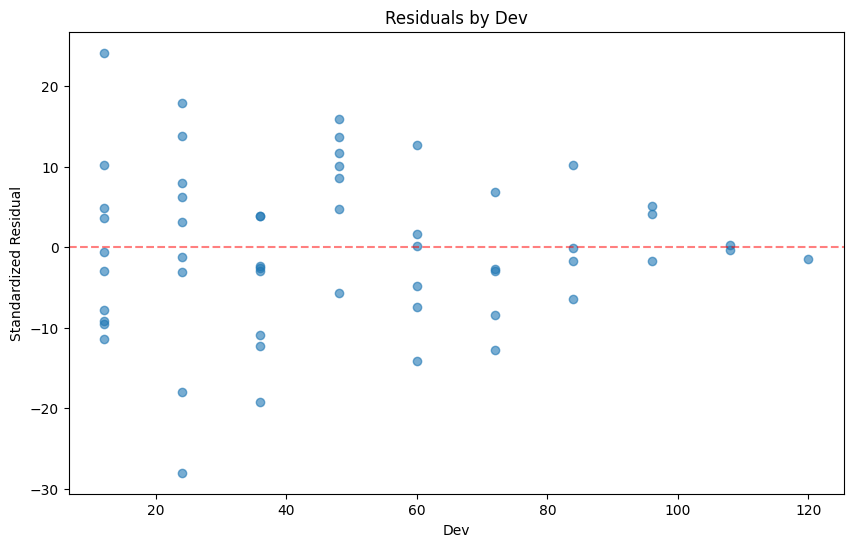

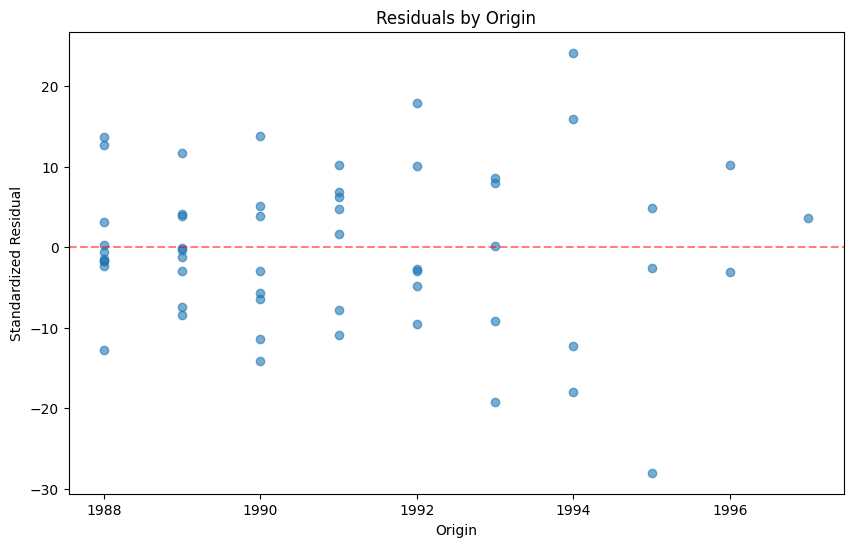

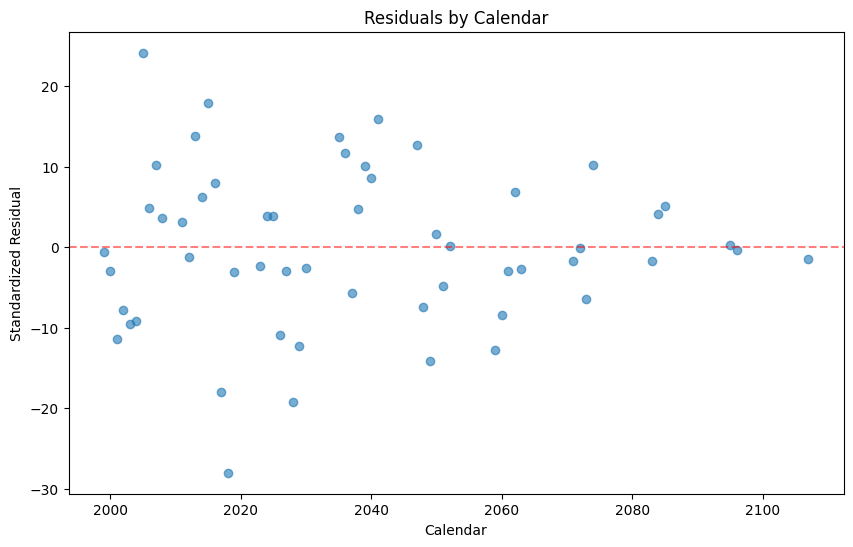

In [25]:
fig, ax = plot_residuals(model_quad_dev, by="dev")
fig, ax = plot_residuals(model_quad_dev, by="origin")
fig, ax = plot_residuals(model_quad_dev, by="calendar")

In [26]:
import arviz as az

az.compare({"Categorical Dev": model.idata, "Spline Dev": model_spline.idata})

/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-r

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Categorical Dev,0,-485.914858,17.478865,0.000000,0.889763,7.430531,0.000000,True,log
Spline Dev,1,-491.190579,14.196480,5.275721,0.110237,7.491048,3.723726,True,log


Sampling: [C(origin), Intercept, alpha, bs(dev, df=5), incremental]


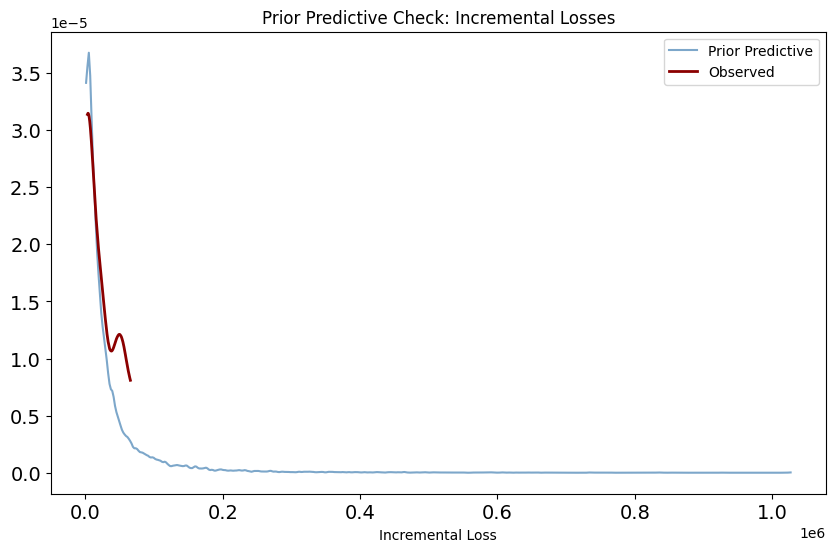

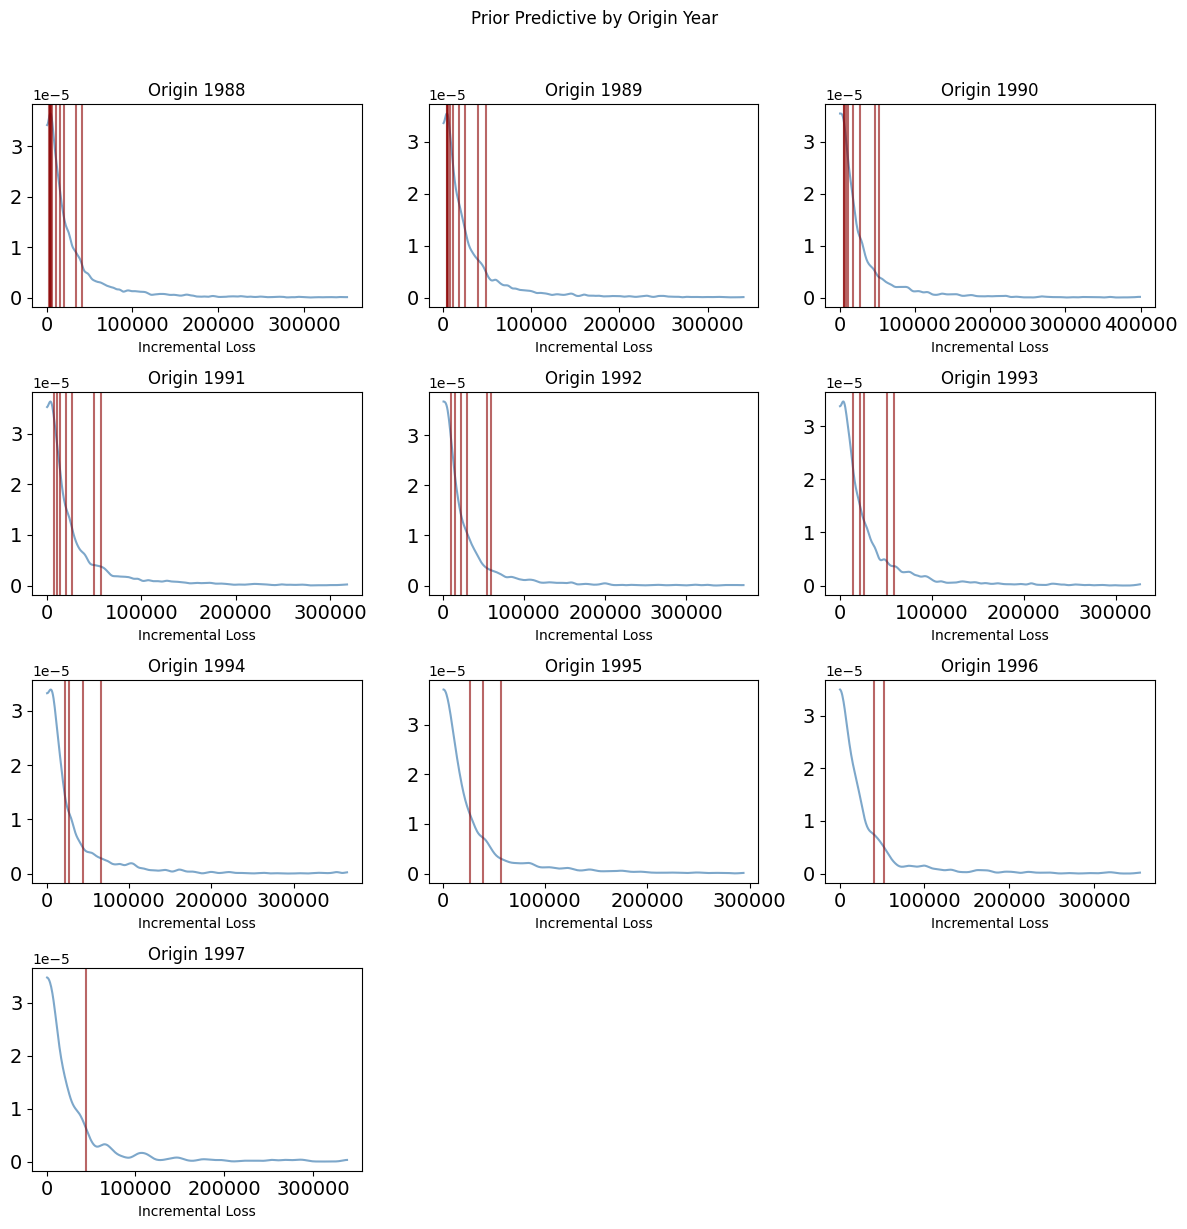

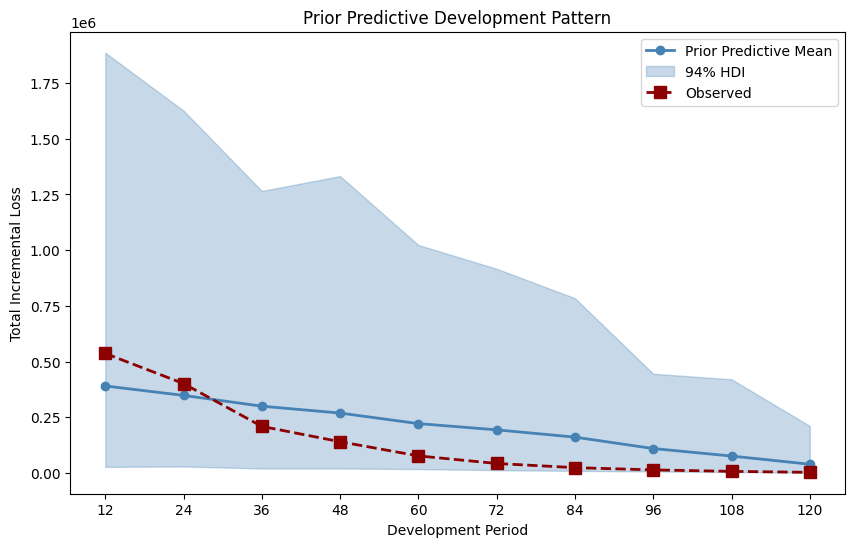

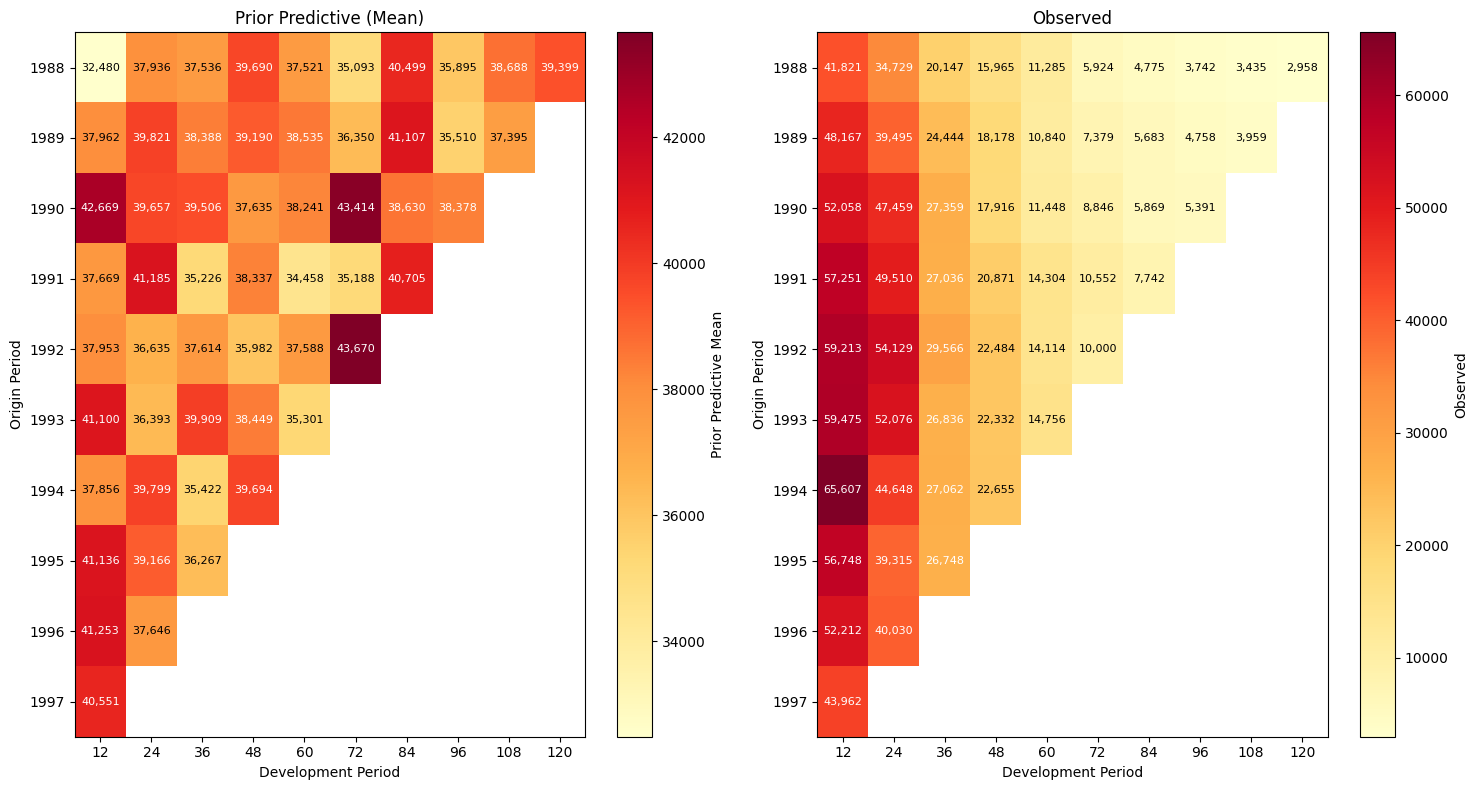

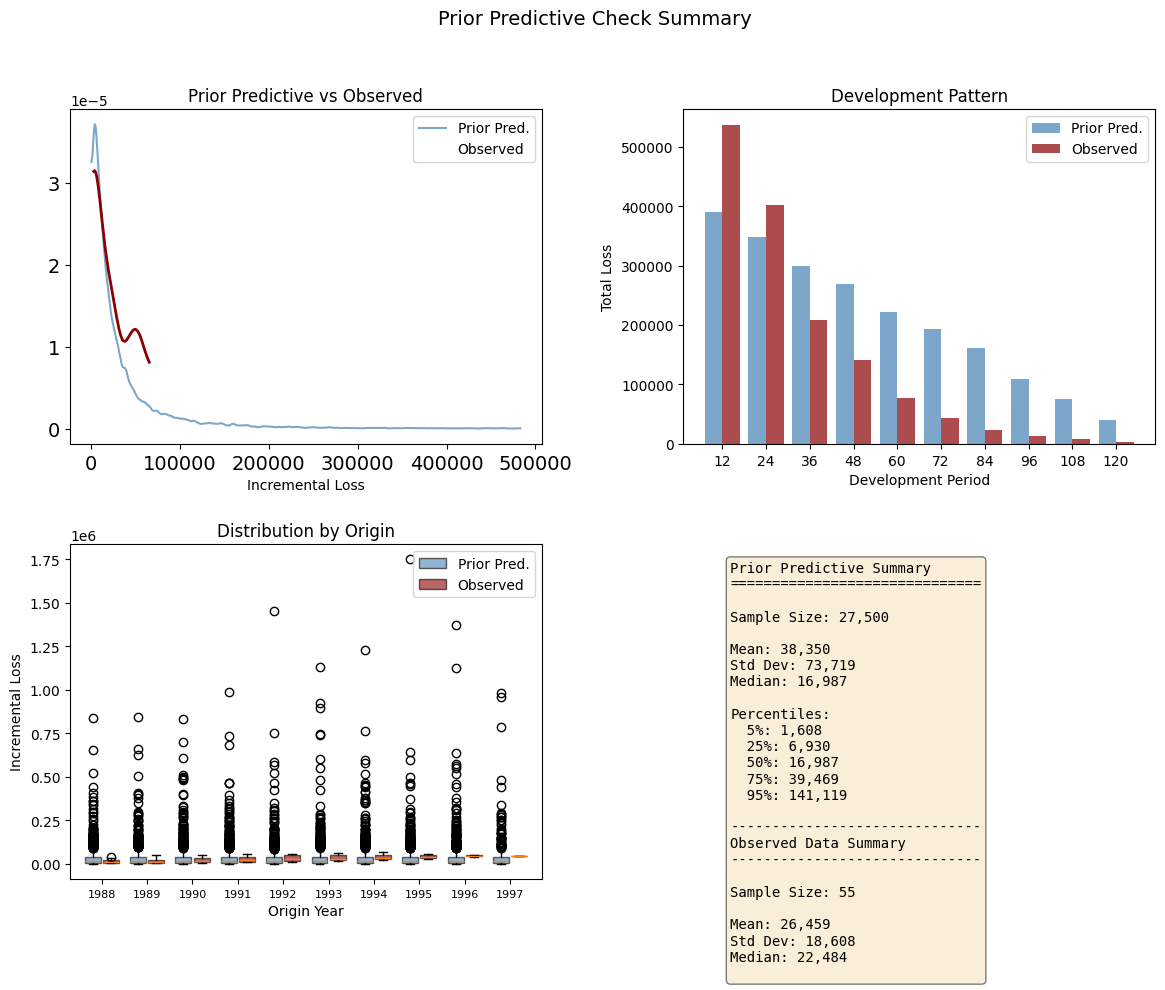

In [ ]:

from bayesianchainladder.plots import (
    plot_prior_predictive,
    plot_prior_predictive_by_origin,
    plot_prior_predictive_development,
    plot_prior_predictive_triangle,
    plot_prior_predictive_summary,
)

import bambi as bmb

priors = {
    # Intercept on log scale - centered on log of typical cell value
    "Intercept": bmb.Prior("Normal", mu=10, sigma=1.0),

    "C(origin)": bmb.Prior("Normal", mu=0, sigma=0.3),
    # "C(dev)": bmb.Prior("Normal", mu=0, sigma=0.3),
    "bs(dev, df=5)": bmb.Prior("Normal", mu=0, sigma=0.3),
    "alpha": bmb.Prior("Gamma", alpha=2, beta=0.5),
}

# model_testprior = BayesianChainLadderGLM(family="negativebinomial", priors=priors)
model_testprior = BayesianChainLadderGLM(formula="incremental ~ 1 + C(origin) + bs(dev, df=5)", family="negativebinomial", priors=priors)

model_testprior.sample_prior_predictive(triangle, draws=500)
fig, ax = plot_prior_predictive(model_testprior, kind="kde")
fig, ax = plot_prior_predictive_by_origin(model_testprior)
fig, ax = plot_prior_predictive_development(model_testprior)
fig, ax = plot_prior_predictive_triangle(model_testprior)
fig, ax = plot_prior_predictive_summary(model_testprior)

<Axes: xlabel='incremental'>

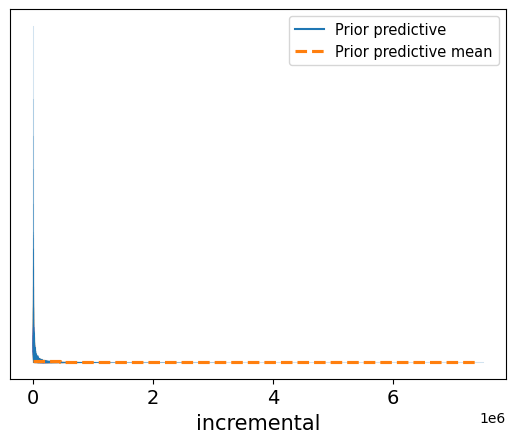

In [7]:
az.plot_ppc(model_testprior.prior_idata_, group="prior")